In [33]:
import sqlite3
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [4]:
conn = sqlite3.connect('/home/nick/Desktop/NUREU17/LSST/VariableStarClassification/features.db')
cur = conn.cursor()

In [12]:
df = pd.read_sql_query("select * from feats2", conn)

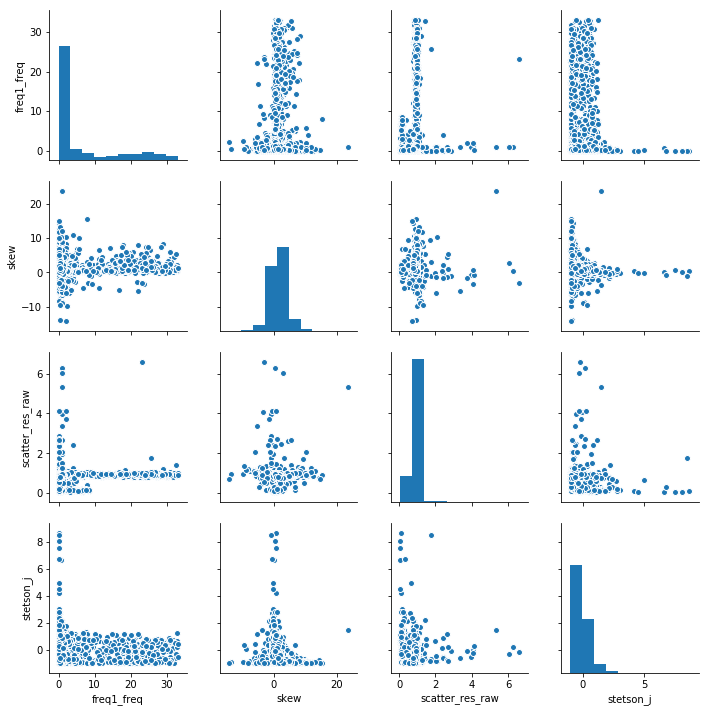

In [34]:
sns.pairplot(df, vars = ('freq1_freq', 'skew', 'scatter_res_raw', 'stetson_j'))

In [37]:
np.median(df['freq1_freq'])

1.0056015819953812